### Features
- For the rest of the homework, you'll need to use the features from the previous homework with additional two 'neighbourhood_group' and 'room_type'. So the whole feature set will be set as follows:

['neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']
- Select only them and fill in the missing values with 0.

In [286]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [323]:
df = pd.read_csv('AB_NYC_2019.csv')
df = df[['neighbourhood_group','room_type','latitude','longitude',
'price','minimum_nights','number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']]

In [288]:
df.isna().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [289]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


### Question 1
- What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [290]:
q1 = df['neighbourhood_group'].mode()[0]
q1

'Manhattan'

### Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value ('price') is not in your dataframe.

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
df_full_train , df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train , df_val = train_test_split(df_full_train, test_size=0.25,random_state=42)

In [293]:
#rest index for datasets
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [294]:
y_train = df_train['price']
y_val = df_val['price']
y_test = df_test['price']
df_train = df_train.drop(['price'] , axis =1)
df_val = df_val.drop(['price'] , axis =1)
df_test = df_test.drop(['price'] , axis =1)

### Question 2
- Create the correlation matrix for the numerical features of your train dataset.
- In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

In [295]:
q2 = df_train.corr()
q2

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


- number_of_reviews and reviews_per_month = 0.590374

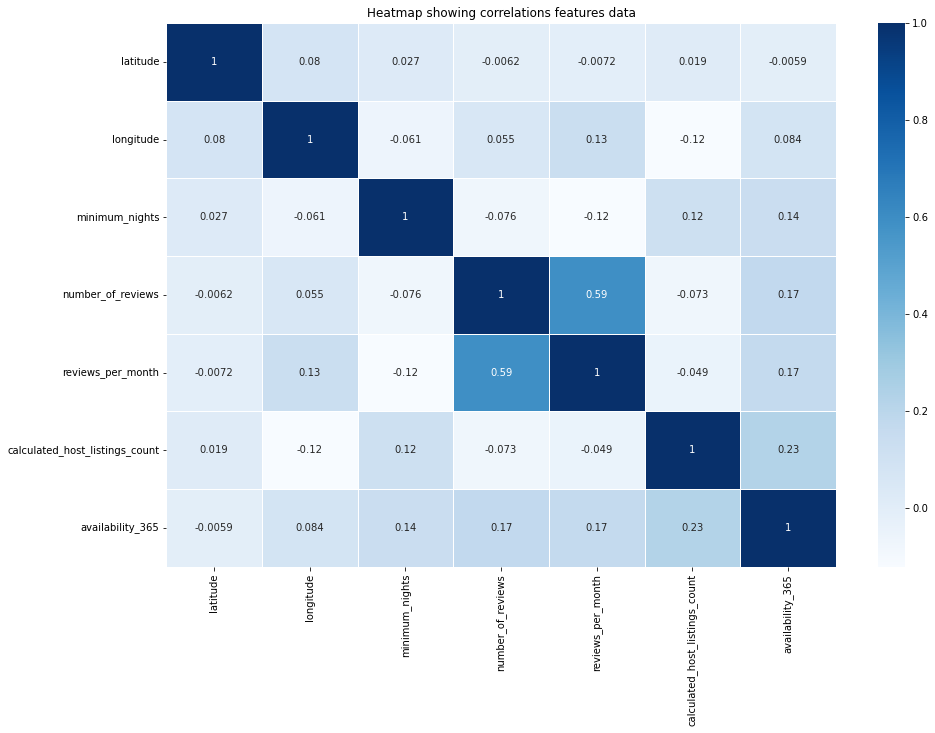

In [296]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_train.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations features data')
plt.show()

### Make price binary
- We need to turn the price variable from numeric into binary.
- Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

In [297]:
y_train

0         99
1         57
2         70
3        130
4        110
        ... 
29332     50
29333    125
29334    299
29335     65
29336     92
Name: price, Length: 29337, dtype: int64

In [298]:

df['above_average'] = np.where(df['price']>=152,1,0)
df = df.drop('price' , axis=1)
#split datasets
df_full_train , df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train , df_val = train_test_split(df_full_train, test_size=0.25,random_state=42)
#rest index for datasets
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
#get y_train , y_val , y_test
y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values
#drop above_average from df_train , df_test , df_val
df_train = df_train.drop(['above_average'] , axis =1)
df_val = df_val.drop(['above_average'] , axis =1)
df_test = df_test.drop(['above_average'] , axis =1)


### Question 3
- Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
- Which of these two variables has bigger score?
- Round it to 2 decimal digits using round(score, 2)

In [299]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29337 entries, 0 to 29336
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             29337 non-null  object 
 1   room_type                       29337 non-null  object 
 2   latitude                        29337 non-null  float64
 3   longitude                       29337 non-null  float64
 4   minimum_nights                  29337 non-null  int64  
 5   number_of_reviews               29337 non-null  int64  
 6   reviews_per_month               29337 non-null  float64
 7   calculated_host_listings_count  29337 non-null  int64  
 8   availability_365                29337 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.0+ MB


In [300]:
from sklearn.metrics import mutual_info_score
print(mutual_info_score(df_train["neighbourhood_group"], y_train).round(2))
print(mutual_info_score(df_train["room_type"], y_train).round(2))


0.05
0.14


- Which of these two variables has bigger score?
room_type

### Question 4
- Now let's train a logistic regression
- Remember that we have two categorical variables in the data. Include them using one-hot encoding.
- Fit the model on the training dataset.
-- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
-- model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [301]:
cat = ['neighbourhood_group', 'room_type']
num = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']


In [302]:
#encode categorical variables
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)



In [303]:
import warnings
warnings.filterwarnings("ignore")

In [304]:
#train model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)



y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred).round(2)
print(accuracy)

0.79


### Question 5
- We have 9 features: 7 numerical features and 2 categorical.
- Let's find the least useful one using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
neighbourhood_group
room_type
number_of_reviews
reviews_per_month

In [305]:
#Feature elimination
features = cat + num
orig_score = accuracy
for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score-score, score)


neighbourhood_group 0.03900296553839866 0.7509970344616014
room_type 0.07366908681869311 0.7163309131813069
latitude 0.003621024644646753 0.7863789753553533
longitude 0.0032119848655282057 0.7867880151344718
minimum_nights 0.0043368442581041 0.7856631557418959
number_of_reviews 0.003109724920748569 0.7868902750792515
reviews_per_month 0.004745884037222647 0.7852541159627774
calculated_host_listings_count 0.0033142448103078426 0.7866857551896922
availability_365 0.008427242049289352 0.7815727579507107
